In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
x = 10*np.random.rand(50)
y = 3*x-8+np.random.randn(50)*4

In [4]:
x=x.reshape(-1,1)
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [5]:
y_pred = model.predict(x)

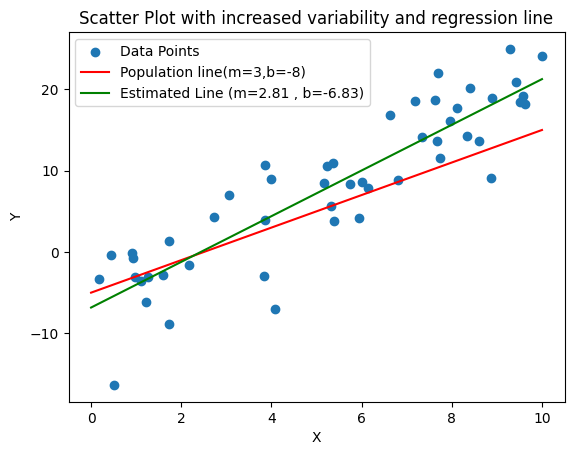

In [10]:
plt.scatter(x,y,label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with increased variability and regression line")

x_line = np.linspace(0,10,100)
y_actual = 2*x_line-5
plt.plot(x_line, y_actual, 'r',label = "Population line(m=3,b=-8)")

y_estimated = model.coef_[0]*x_line+model.intercept_
plt.plot(x_line,y_estimated,'g',label=f"Estimated Line (m={model.coef_[0]:.2f} , b={model.intercept_:.2f})")
plt.legend()
plt.show()

Assumption 1 - Individual Scatter Plots

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x=7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)
df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,3.785788,0.229846,15.328676
1,-0.018497,-1.564336,3.706776
2,-0.852154,2.336076,9.339480
3,-2.113649,1.492036,9.500867
4,-2.627109,-2.598707,14.504919
...,...,...,...
95,1.460579,-1.446922,6.531055
96,-2.086131,-0.413963,5.024551
97,2.962636,-0.455579,9.284029
98,-1.921394,-2.444844,10.479552


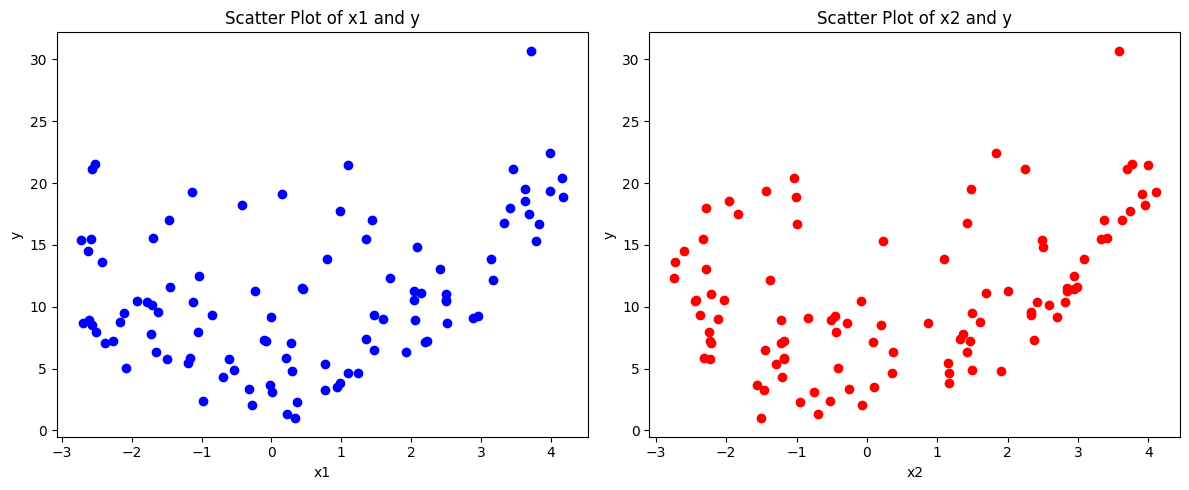

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.scatter(df['x1'],df['y'],color = 'blue')
ax1.set_title("Scatter Plot of x1 and y")
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

ax2.scatter(df['x2'],df['y'],color = 'red')
ax2.set_title("Scatter Plot of x2 and y")
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

#create scatter plot for both dependent and independednt variables and check for linearity

Assumption 2 - Residual Plots

Text(0, 0.5, 'Residuals')

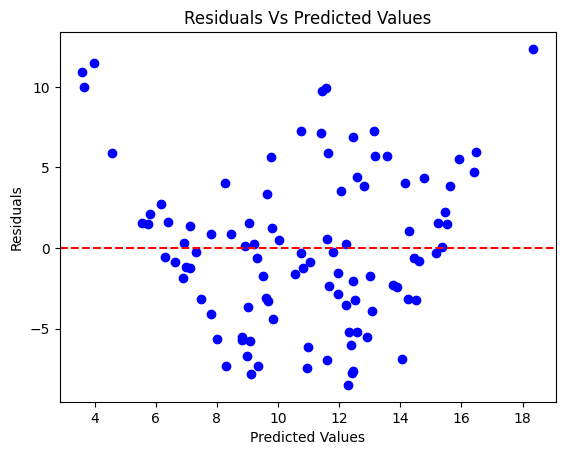

In [19]:
x = df[['x1','x2']]
y = df['y']
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)
residual = y-y_pred

plt.scatter(y_pred, residual, color = 'blue')
plt.axhline(y = 0, color = 'red' , linestyle= '--')
plt.title("Residuals Vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

Assumption 3 - Adding Polynomial Term

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_model.pred = linear_model.predict(x_test)

linear_r2 = r2_score(y_test,linear_model.pred)
linear_mse= mean_squared_error(y_test, linear_model.pred)

poly_features = PolynomialFeatures(degree = 2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)


poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
poly_y_pred = poly_model.predict(x_test_poly)
poly_r2 = r2_score(y_test,poly_y_pred)
poly_mse= mean_squared_error(y_test, poly_y_pred)

print("R-Squared Value before Adding Polynomial Term : " , linear_r2)
print("Mean Squared Error Value before Adding Polynomial Term : " ,linear_mse)
print()
print("R-Squared Value after Adding Polynomial Term : " ,poly_r2 )
print("Mean Squared Error Value after Adding Polynomial Term : " ,poly_mse)

R-Squared Value before Adding Polynomial Term :  -0.2887395695383588
Mean Squared Error Value before Adding Polynomial Term :  35.01074587085712

R-Squared Value after Adding Polynomial Term :  0.9789030883377465
Mean Squared Error Value after Adding Polynomial Term :  0.5731325632623042
